In [282]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 
from sklearn.model_selection import train_test_split
%matplotlib inline

In [283]:
# In here we are getting the enconder
import chardet
file = 'U:\XboxGamePassDataScience\XboxGamePass.csv'
with open(file, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'utf-8', 'confidence': 0.938125, 'language': ''}

In [284]:
# In here we are retreaving the csv's info and getting in into a DataFrame called df
df = pd.read_csv(file, encoding='utf-8')
# df

In [285]:
# Here we conver a .csv into a parquetfile
from fastparquet import ParquetFile
parquet = df.to_parquet()
# parquet
# What is happening here?

In [286]:
# Here we drop all rows that contain a type of NaN value
# df.isnull().sum()
df = df.dropna()
# df

In [287]:
# This is a quick way to get the column names
# df.columns

'''
Definition of columns:
Game: Name of the game
Ratio: This column is made with MaxGameScore column and game score column
Gamers: Amount of players
Comp %: Percentage of players that completed the game
Time: Time required for completition
Rating: Rating out of 5
Date: Date in which the game was added to the GamePass
True_Achievement: The total reachable amount of points a player can get in the game
Game_Score: The points that the player achieved
'''

# Here I am getting the head
df.head(10)

,GAME,RATIO,GAMERS,COMP %,TIME,RATING,ADDED,True_Achievement,Game_Score
0,Mass Effect Legendary Edition,1.87,"84,143",4.1,100-120 hours,4.8,06 Jan 22,5442,2915
1,The Elder Scrolls V: Skyrim Special Edition,1.97,"213,257",8.0,80-100 hours,4.7,15 Dec 20,3055,1550
2,Mass Effect 2,1.34,"221,178",9.6,50-60 hours,4.7,09 Nov 20,1819,1355
3,Stardew Valley,3.04,"51,530",1.0,150-200 hours,4.7,02 Dec 21,3036,1000
4,It Takes Two,1.68,"71,981",15.6,12-15 hours,4.7,03 Nov 21,1678,1000
5,Hades,2.40,"83,710",6.1,60-80 hours,4.6,18 Jun 21,2404,1000
6,Resident Evil 7: Biohazard Grotesque Ver.,1.58,777,9.8,15-20 hours,4.6,17 Sep 20,2560,1620
7,Yakuza: Like a Dragon,2.13,"39,229",3.8,80-100 hours,4.6,13 Jun 21,2130,1000
8,Forza Horizon 4,2.91,"379,536",0.9,60-80 hours,4.6,18 Dec 19,10516,3610
9,HITMAN 3,2.73,"63,570",1.9,25-30 hours,4.6,13 Mar 22,4202,1540


In [288]:
'''
Data wrangling will include:
1. Deleting the NaN values from the dataset
2. Renaming the columns into: - DONE
    + Game
    + Ratio
    + Players
    + AvgCompleted
    + Time
    + Rating
    + Date
    + MaxGameScore
    + AvgGameScore
3. The average from the minimum an maximum time will supplant the Time column
4. Get rid of Date as it is not going to be useful
5. Convert all numeric values from string to float
6. Change the ratio, insted of being MaxGameScore/AvgGameScore it will become AvgGameScore/MaxGameScore
'''

'\nData wrangling will include:\n1. Deleting the NaN values from the dataset\n2. Renaming the columns into: - DONE\n    + Game\n    + Ratio\n    + Players\n    + AvgCompleted\n    + Time\n    + Rating\n    + Date\n    + MaxGameScore\n    + AvgGameScore\n3. The average from the minimum an maximum time will supplant the Time column\n4. Get rid of Date as it is not going to be useful\n5. Convert all numeric values from string to float\n6. Change the ratio, insted of being MaxGameScore/AvgGameScore it will become AvgGameScore/MaxGameScore\n'

In [289]:
# 1. Deleting the NaN values from the dataset
df.dropna(inplace = True)

In [290]:
# 2. Renaming of columns - DONE
df.columns = ['Game', 'Ratio', 'Players', 'AvgCompleted', 'Time', 'Rating', 'Date', 'MaxGameScore', 'AvgGameScore']
# df.columns

In [291]:
# 3. The average from the minimum an maximum time will supplant the Time column

# We first need to in a new dataframe save the data separed by the -
timeAvg = df["Time"].str.split("-", n = 1, expand = True)

# Then we rename the columns
timeAvg.columns = ['A', 'B']

# Here we are extracting the digits from each columns to make sure we are only with numbers
df['A'] = timeAvg.A.str.extract('(\d+)')
df['B'] = timeAvg.B.str.extract('(\d+)')

df.dropna(inplace = True)

df[['A', 'B']] = df[['A', 'B']].astype(float)

df['Time'] = df[['A','B']].mean(axis=1)

df = df.drop(['A', 'B'], axis=1)

# df

In [292]:
# 4. Get rid of the date column as it is not going to be used
df = df.drop(['Date'], axis=1)
df

,Game,Ratio,Players,AvgCompleted,Time,Rating,MaxGameScore,AvgGameScore
0,Mass Effect Legendary Edition,1.87,"84,143",4.1,110.0,4.8,5442,2915
1,The Elder Scrolls V: Skyrim Special Edition,1.97,"213,257",8.0,90.0,4.7,3055,1550
2,Mass Effect 2,1.34,"221,178",9.6,55.0,4.7,1819,1355
3,Stardew Valley,3.04,"51,530",1.0,175.0,4.7,3036,1000
4,It Takes Two,1.68,"71,981",15.6,13.5,4.7,1678,1000
...,...,...,...,...,...,...,...,...
440,Paradise Killer,1.57,"1,250",18.0,13.5,4.2,1565,1000
445,Super Mega Baseball 3,7.96,"9,309",0.1,70.0,3.8,7957,1000
446,Immortal Realms: Vampire Wars,4.76,"5,618",0.9,70.0,3.5,4761,1000
447,Transformers: Battlegrounds,2.40,"1,733",1.0,17.5,3.1,2873,1195


In [293]:
# 5. Convert all numeric columns's values from string to float

# First we replace all , for . in players
df['Players'] = df['Players'].replace(',', '', regex=True)

# Then we parse into a float type
df[['Players', 'Ratio', 'AvgCompleted', 'Rating', 'MaxGameScore', 'AvgGameScore']] = df[['Players', 'Ratio', 'AvgCompleted', 'Rating', 'MaxGameScore', 'AvgGameScore']].astype(float)

# df.head()

In [294]:
# 6. Change the ratio, insted of being MaxGameScore/AvgGameScore it will become AvgGameScore/MaxGameScore
df['Ratio'] = df['AvgGameScore']/df['MaxGameScore']
df.head()

,Game,Ratio,Players,AvgCompleted,Time,Rating,MaxGameScore,AvgGameScore
0,Mass Effect Legendary Edition,0.535649,84143.0,4.1,110.0,4.8,5442.0,2915.0
1,The Elder Scrolls V: Skyrim Special Edition,0.507365,213257.0,8.0,90.0,4.7,3055.0,1550.0
2,Mass Effect 2,0.744915,221178.0,9.6,55.0,4.7,1819.0,1355.0
3,Stardew Valley,0.329381,51530.0,1.0,175.0,4.7,3036.0,1000.0
4,It Takes Two,0.595948,71981.0,15.6,13.5,4.7,1678.0,1000.0


In [295]:
'''
Logistic Regression
'''

'\nLogistic Regression\n'

In [296]:
# We create a new dataframe
dfLR = df

In [297]:
# Careful to only run this operation once
dfLR['Rating'].where((dfLR['Rating'] > 3.5), 0, inplace=True)
dfLR['Rating'].where(dfLR['Rating'] <= 3.5, 1, inplace=True)

In [298]:
# dfLR['Ratio'].mean()
# dfLR['Players'].mean()

In [299]:
# dfLR[['Ratio', 'Players']].sub([.35, 50000], axis='columns')

In [300]:
# dfLR["Rating"] = np.sign(df["Rating"]).astype(int)
# dfLR['Rating'].head(50)
# criteria = dfLR[dfLR['Rating'] == 1]
# criteria

In [301]:
# Variable output
y = dfLR['Rating']
# Variable inputs
X = dfLR.drop(columns = ['Game', 'AvgCompleted', 'Time', 'Rating', 'MaxGameScore', 'AvgGameScore'])

# We create the train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=45)

X

,Ratio,Players
0,0.535649,84143.0
1,0.507365,213257.0
2,0.744915,221178.0
3,0.329381,51530.0
4,0.595948,71981.0
...,...,...
440,0.638978,1250.0
445,0.125676,9309.0
446,0.210040,5618.0
447,0.415942,1733.0


In [302]:
# We import the model for Logistic Regression
from sklearn.linear_model import LogisticRegression

# We create an empty model
log_model = LogisticRegression()
# We train the model with 80% of the available data
log_model.fit(X_train,y_train)
# We use the available 20% for test
y_pred = log_model.predict(X_test)

In [303]:
comp_t = pd.DataFrame({'Test': y_test})
comp_t.reindex(method='bfill')
comp_t.index = range(comp_t.shape[0])
comp_p = pd.DataFrame({'Pred': y_pred})

#print(comp_t,round(comp_p,1))

comp = pd.merge(comp_t,comp_p,left_index=True, right_index=True)
comp

,Test,Pred
0,0.0,1.0
1,1.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
...,...,...
79,1.0,1.0
80,1.0,1.0
81,1.0,1.0
82,1.0,1.0


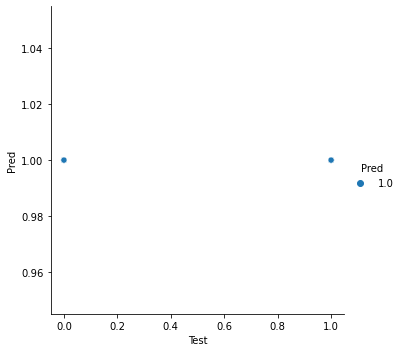

In [304]:
# Graficar Datos Prueba vs Datos Predictivos
import seaborn as sns

sns.relplot(x='Test',y='Pred',data=comp, hue="Pred")

In [305]:
# import for the confusion matrix
from sklearn.metrics import confusion_matrix
# Create confusion matrix
cmatrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

In [306]:
# Extract values from the confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  0
False Positives:  32
False Negatives:  0
True Positives:  52


In [307]:
# Accuracy (%) 
Accuracy = (tn+tp)*100/(tp+tn+fp+fn) 

print("Accuracy {:0.2f}%".format(Accuracy))

Accuracy 61.90%


In [308]:
# Precision
Precision = tp/(tp+fp) 
print("Precision {:0.2f}".format(Precision))

Precision 0.62


In [309]:
# Specificity 

Specificity = tn/(tn+fp)
print("Specificity {:0.2f}".format(Specificity))

Specificity 0.00


In [313]:
y_pred

,0
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
79,1.0
80,1.0
81,1.0
82,1.0


IndexError: index 1 is out of bounds for axis 1 with size 1

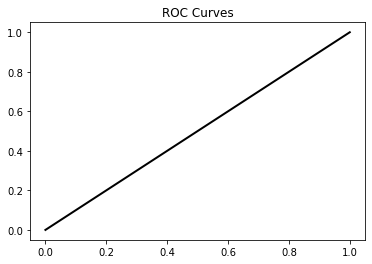

In [311]:
y_pred = y_pred.astype(float)
y_pred = pd.DataFrame(y_pred)

import scikitplot as skplt

# Compare prediction against training
skplt.metrics.plot_roc(y_test, y_pred)

plt.show()